In [128]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sm_stat
import operator
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [129]:
def load_file(filename):
    lst = []
    with open(filename, 'r') as f:
        for line in f:
            lst.append(float(line))
    return lst
data = load_file('y4.txt')
print(len(data))

199


In [130]:
test_df = adfuller(data, maxlag=None, regression='ct', autolag='t-stat', store=False, regresults=True)

In [131]:
print(f'ADF Statistic: {test_df[0]}')
print(f'p-value: {test_df[1]}')
print(f'critical values: {test_df[2]}')
test_df[3].__dict__['resols'].summary()

ADF Statistic: -1.8171813783995552
p-value: 0.6964152313133696
critical values: {'1%': -4.008832839770228, '5%': -3.434625048376243, '10%': -3.141221698677776}


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     158.6
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           5.11e-92
Time:                        22:29:44   Log-Likelihood:                -226.18
No. Observations:                 184   AIC:                             486.4
Df Residuals:                     167   BIC:                             541.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1458      0.080     -1.817      0.071      -0.304       0.013
x2            -0.9010      0.104     -8.670      0.000      -1.106      -0.696
x3            -0.9616      0.125     -7.684      0.000      -1.209      -0.715
x4            -0.9672      0.145     -6.680      0.000      -1.253      -0.681
x5            -0.0341      0.162     -0.210      0.834      -0.355       0.286
x6            -0.0039      0.162     -0.024      0.981      -0.323       0.315
x7             0.0691      0.161      0.428      0.669      -0.249       0.388
x8            -0.0549      0.161     -0.342      0.733      -0.372       0.262
x9            -0.0609      0.160     -0.380      0.704      -0.377       0.255
x10            0.0652      0.160      0.409      0.683      -0.250       0.380
x11            0.0746      0.160      0.467      0.641      -0.240       0.390
x12            0.2919      0.159      1.836      0.068      -0.022       0.606
x13            0.3140      0.137      2.288      0.023       0.043       0.585
x14            0.1622      0.110      1.473      0.143      -0.055       0.380
x15            0.1537      0.078      1.983      0.049       0.001       0.307
const          0.2631      0.161      1.638      0.103      -0.054       0.580
x16            0.0050      0.003      1.737      0.084      -0.001       0.011
==============================================================================
Omnibus:                        0.214   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.058
Skew:                           0.029   Prob(JB):                        0.972
Kurtosis:                       3.065   Cond. No.                         587.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

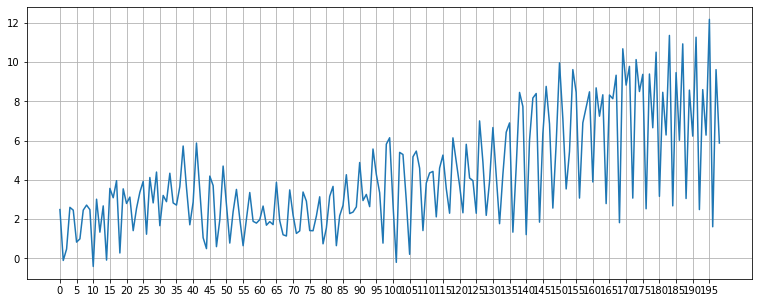

In [132]:
def show_plot(y, x_ticks):
 plt.figure(figsize=(13,5))
 plt.plot(y)
 plt.grid()
 plt.xticks(np.arange(0, len(y)+1, x_ticks))
 plt.show()
show_plot(data, 5)

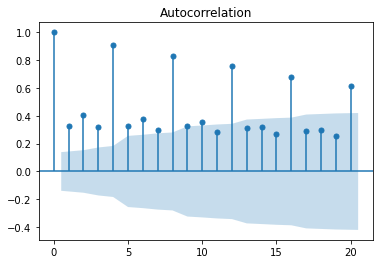

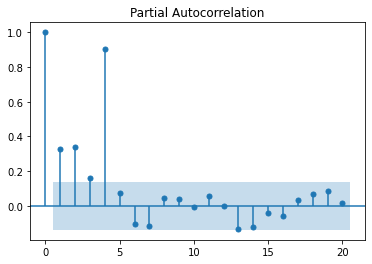

In [133]:
sm.graphics.tsa.plot_acf(data, lags=20) 
sm.graphics.tsa.plot_pacf(data, lags=20)
plt.show()

In [134]:
s_period = 4
new_data_len = (len(data) // s_period) * 3
season_dataset = data[:new_data_len]
print(f"Длина обучающей выборки: {new_data_len}\n Длина тестовой выборки: {len(data) - new_data_len}")

Длина обучающей выборки: 147
 Длина тестовой выборки: 52


In [135]:
diff_data = pd.Series(season_dataset)
diff_data = diff_data.diff(s_period).dropna()

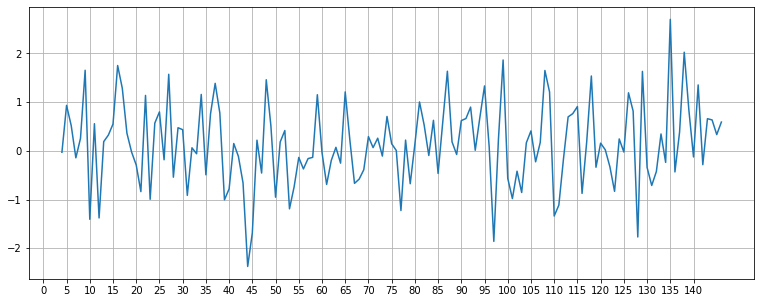

In [136]:
show_plot(diff_data, 5)

In [137]:
test_df = adfuller(diff_data, maxlag=None, regression='ct', autolag='t-stat', store=False, regresults=True)
print(f'ADF Statistic: {test_df[0]}')
print(f'p-value: {test_df[1]}')
print(f'critical values: {test_df[2]}')
test_df[3].__dict__['resols'].summary()

ADF Statistic: -5.092780683138575
p-value: 0.00013896325003263864
critical values: {'1%': -4.026927225012085, '5%': -3.443278929084826, '10%': -3.146282869746082}


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     16.44
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           1.60e-16
Time:                        22:30:39   Log-Likelihood:                -166.72
No. Observations:                 136   AIC:                             351.4
Df Residuals:                     127   BIC:                             377.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.2166      0.239     -5.093      0.000      -1.689      -0.744
x2             0.2638      0.219      1.204      0.231      -0.170       0.697
x3             0.1695      0.198      0.856      0.394      -0.222       0.561
x4             0.2004      0.174      1.150      0.253      -0.145       0.545
x5             0.1328      0.150      0.883      0.379      -0.165       0.431
x6             0.1252      0.119      1.050      0.296      -0.111       0.361
x7             0.1564      0.086      1.819      0.071      -0.014       0.326
const         -0.0126      0.147     -0.086      0.932      -0.304       0.279
x8             0.0025      0.002      1.320      0.189      -0.001       0.006
==============================================================================
Omnibus:                        0.004   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.040
Skew:                           0.000   Prob(JB):                        0.980
Kurtosis:                       2.916   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

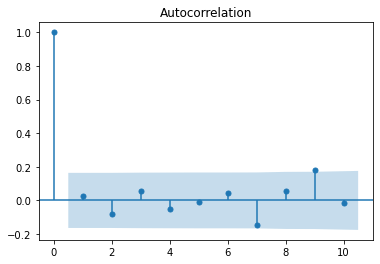

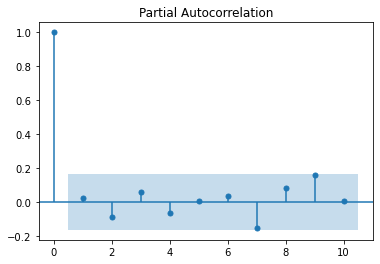

In [138]:
sm.graphics.tsa.plot_acf(diff_data, lags=10) 
sm.graphics.tsa.plot_pacf(diff_data, lags=10)
plt.show()

In [139]:
class ModelParams:
    def __init__(self, p=0, d=0, q=0, P=0, Q=0, D=0, s=0, tvalues=0, pvalues=0, AIC=0, BIC=0, trend=None):
        self.p = p
        self.d = d
        self.q = q
        self.P = P
        self.D = D
        self.Q = Q
        self.s = s
        self.tvalues = tvalues
        self.pvalues = pvalues
        self.AIC = AIC
        self.BIC = BIC
        self.trend = trend
        self.sum_metric = (AIC + BIC) / 2

In [141]:
season_models_chars = []
for p in range(0+1):
    for q in range(1+1):
        try:
            model = sm.tsa.statespace.SARIMAX(diff_data,
                             order=(p, 0, q),
                             seasonal_order=(0, 1, 0, s_period)
                            ).fit(full_output=True, disp=0)
            print(model.summary())
        except: # Если процесс не стационарен
            continue
        mp = ModelParams(p=p, d=0,
                         q=q, P=0, D=1, Q=0, s=s_period,
                         tvalues=model.tvalues, pvalues=model.pvalues,
                         AIC=model.aic, BIC=model.bic)
        season_models_chars.append(mp)



                                SARIMAX Results                                
Dep. Variable:                       y   No. Observations:                  143
Model:             SARIMAX(0, 1, 0, 4)   Log Likelihood                -227.660
Date:                 Sun, 18 Apr 2021   AIC                            457.319
Time:                         22:32:38   BIC                            460.254
Sample:                              0   HQIC                           458.512
                                 - 143                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.5493      0.183      8.468      0.000       1.191       1.908
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.01
Prob(Q):                              0

In [143]:
season_models = []
for m in season_models_chars:
    if max(m.pvalues) > 0.05:
        continue # Если да, то модель имеет незначимые коэффициенты
    season_models.append(m)
print("Количество скомпилированных моделей: {} \n"
 "Из них модели только со значимыми членами: {} \n".format(len(season_models_chars),
 len(season_models)))
for m in season_models:
    print("SARIMA ({},{},{})({},{},{},{})\n pvalues: {} \nAIC: {} BIC: {} Sum_metric: {}\n"
          .format(m.p, m.d, m.q, m.P, m.D, m.Q, m.s, m.pvalues, m.AIC, m.BIC, m.sum_metric))

Количество скомпилированных моделей: 2 
Из них модели только со значимыми членами: 1 

SARIMA (0,0,0)(0,1,0,4)
 pvalues: sigma2    2.500531e-17
dtype: float64 
AIC: 457.319266474102 BIC: 460.25374040723267 Sum_metric: 458.78650344066733



In [144]:
model = sm.tsa.statespace.SARIMAX(season_dataset,
                                      order=(0, 0, 0),seasonal_order=(0, 1, 0, 4)).fit(full_output=True, disp=0)
test_lj = sm_stat.diagnostic.acorr_ljungbox(model.resid)
print("Model: SARIMA({},{},{})x({},{},{},{}) AIC:{:.2f}\n "
          "The Ljung-Box test: {} pvalue: {}\n".format(m.p, m.d, m.q, m.P, m.D, m.Q, m.s, 
                                                            m.AIC, al_test_res[0][0], 
                                                            test_lj[1][0]))

Model: SARIMA(0,0,0)x(0,1,0,4) AIC:457.32
 The Ljung-Box test: 0.051100702409788305 pvalue: 0.8211589197581122



In [149]:
training_data_len = len(season_dataset)
testing_data_len = len(data) - len(season_dataset) + 1
predict = model.predict(training_data_len, training_data_len + testing_data_len - 1)
predicts_by_s_model = list(predict[-testing_data_len:])

In [153]:
history_endog = list(season_dataset)
y_pred = []
for element in data[-testing_data_len:]:
        model = sm.tsa.statespace.SARIMAX(endog=history_endog,
                                      order=(0, 0, 0),seasonal_order=(0, 1, 0, 4)).fit(full_output=True, disp=0)
        forecast = model.forecast()[0]
        y_pred.append(forecast)
        history_endog.append(element)

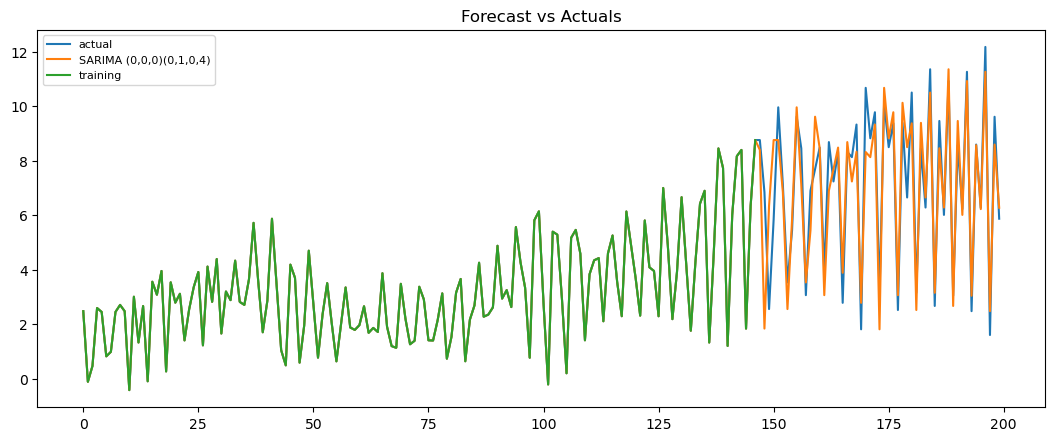

In [154]:
plt.figure(figsize=(13,5), dpi=100)
plt.plot(season_dataset[:training_data_len] + data[-testing_data_len:], label='actual')
plt.plot(season_dataset[:training_data_len] + y_pred, label='SARIMA (0,0,0)(0,1,0,4)')
plt.plot(season_dataset[:training_data_len], label='training')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()